In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
data = np.load('input_data/vae_input_data.npz', allow_pickle=True)
recipes_array = data['recipes']
recipes_df = pd.DataFrame(recipes_array)
recipes_df.head()

,Unnamed: 0,RecipeId,Name,AuthorId,AuthorName,DatePublished,RecipeCategory,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,PrepTime_minutes,TotalTime_minutes
0,1,39,Biryani,1567,elly9812,1999-08-29T13:12:00Z,Chicken Breast,"c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and...",240.0,265.0
1,2,40,Best Lemonade,1566,Stephen Little,1999-09-05T19:52:00Z,Beverages,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ...",30.0,35.0
2,4,42,Cabbage Soup,1538,Duckie067,1999-09-19T06:19:00Z,Vegetable,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil...",20.0,50.0
3,5,43,Best Blackbottom Pie,34879,Barefoot Beachcomber,1999-08-21T10:35:00Z,Pie,"c(""graham cracker crumbs"", ""sugar"", ""butter"", ...",437.9,19.3,10.9,94.3,267.6,58.0,1.8,42.5,7.0,"c(""Graham Cracker Crust: In small bowl, combin...",20.0,140.0
4,6,44,Warm Chicken A La King,1596,Joan Edington,1999-09-17T04:47:00Z,Chicken,"c(""chicken"", ""butter"", ""flour"", ""milk"", ""celer...",895.5,66.8,31.9,405.8,557.2,29.1,3.1,5.0,45.3,"c(""Melt 1 1/2 ozs butter, add the flour and co...",35.0,38.0


In [ ]:
z_all = np.load('output_embeds/latent_recipes.npy')
loss_df = pd.read_csv('output_loss/training_losses.csv')

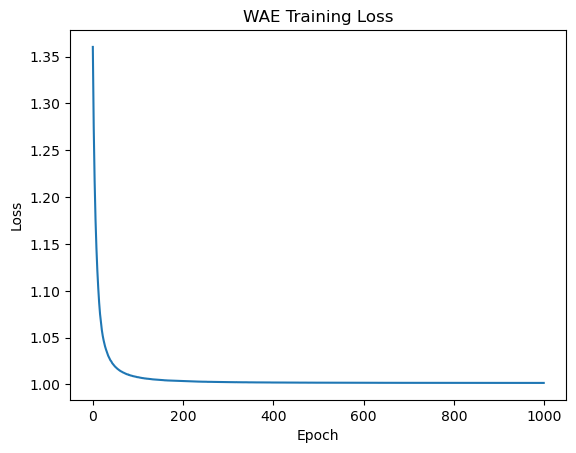

In [16]:

plt.plot(loss_df['epoch'], loss_df['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("WAE Training Loss")
plt.show()

In [22]:
liked_indices = [90]

# You can also keep track by recipe_id or name if you prefer
liked_recipes = recipes_df.iloc[liked_indices]

# Average latent vector of liked recipes
user_vector = z_all[liked_indices].mean(axis=0, keepdims=True)

# Compute similarity to all recipes
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(user_vector, z_all).flatten()

# Ignore already liked recipes
for idx in liked_indices:
    similarities[idx] = -1

# Top 5 recommendations
recommended_indices = similarities.argsort()[::-1][:5]
recommended_recipes = recipes_df.iloc[recommended_indices]

print("Original liked recipes:")
print(liked_recipes[['RecipeId', 'Name', 'RecipeInstructions']])

print("==================================")
print("\nRecommended recipes:")
print(recommended_recipes[['RecipeId', 'Name', 'RecipeInstructions']])

Original liked recipes:
    RecipeId                             Name  \
90       144  Cheesy Chicken Noodle Casserole   

                                   RecipeInstructions  
90  c("Cook egg noodles in boiling water till chew...  

Recommended recipes:
        RecipeId                              Name  \
356473    380931                   Easy Lemon Cake   
277013    297326     Pasta Shells With Tuscan Tuna   
248759    267654                Camembert Aux Noix   
464628    496251       Basic Polenta (Slow Cooker)   
266660    286476  Chicken Tortellini Skillet for 2   

                                       RecipeInstructions  
356473  c("Prepare cake mix as directed on package for...  
277013  c("Cook pasta according to package directions,...  
248759  c("Cream softened butter until light and fluff...  
464628  "Stir together the cornmeal, salt, and water i...  
266660  c("Cook tortellini according to package direct...  
